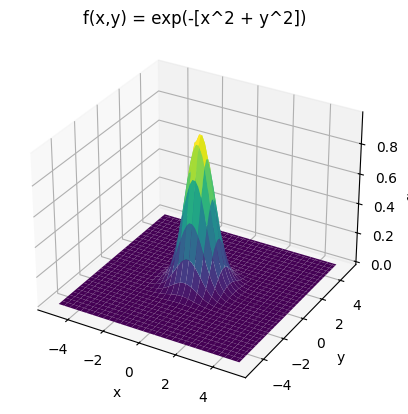

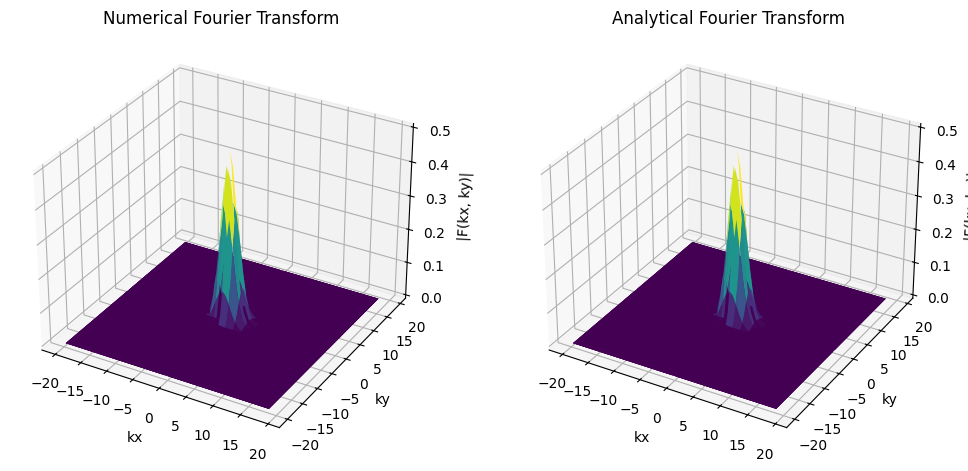

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Gaussian function
def f(x, y):
    return np.exp(-(x**2 + y**2))

# Define grid of points
n = 64 # Number of points in each dimension
xmin = -5
xmax = 5
dx = (xmax - xmin)/(n-1)
x = np.linspace(xmin, xmax, n)

m = 64
ymin = -5
ymax = 5
dy = (ymax - ymin)/(m-1)
y = np.linspace(ymin, ymax, m)

X, Y = np.meshgrid(x, y)

# Compute the Gaussian function values
farr = f(X, Y)

# PLot f(x,y)
def plot_3d_graph(X, Y, f):    # function for 3D plot

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, f, cmap='viridis')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax.set_title('f(x,y) = exp(-[x^2 + y^2])')
    
    plt.show()

plot_3d_graph(X, Y, farr)



# DFT of farr
dft_arr = np.fft.fft2(farr, norm = 'ortho') # doubt

# array of kx and ky values
kx = 2 * np.pi * np.fft.fftfreq(n, dx)
ky = 2 * np.pi * np.fft.fftfreq(m, dy)
KX, KY = np.meshgrid(kx, ky)


# Function to calculate FT from DFT
def calculate_FT(dft, kx, ky):

    Farr =  np.zeros((dft.shape), dtype=np.complex128)

    for q in range(len(kx)):
        for v in range(len(ky)):

            Farr[q][v]=(dx * np.sqrt(n/(2*np.pi)) * dy * np.sqrt(m/(2*np.pi)) * np.exp((-(1j)*kx[q]*xmin) + (-(1j)*ky[v]*ymin)) * (dft[q][v]))

    return Farr

# Calculate  F(KX, KY), fourier transform of f(X,Y)
Farr = calculate_FT(dft_arr, kx, ky)

# analytical fourier transform
F_analytical = np.exp(-(KX**2 + KY**2)/4)/2

# Plot the numerical result
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(KX, KY, np.abs(Farr), cmap='viridis')
ax1.set_title('Numerical Fourier Transform')
ax1.set_xlabel('kx')
ax1.set_ylabel('ky')
ax1.set_zlabel('|F(kx, ky)|')

# Plot the analytical result
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(KX, KY, F_analytical, cmap='viridis')
ax2.set_title('Analytical Fourier Transform')
ax2.set_xlabel('kx')
ax2.set_ylabel('ky')
ax2.set_zlabel('|F(kx, ky)|')

plt.show()
